![pew pew](https://raw.githubusercontent.com/dotabuff/d2vpk/master/dota_pak01/resource/flash3/images/items/dagon_5.png)


# NYX NYX NYX 

So I sumbled a upon a thread on reddit discussing nyx damage, and how you shouldn't upgrade dagon past lvl 1.
Can we trust OP ?
 
Image below. http://www.reddit.com/r/DotA2/comments/35u0h2/kill_with_nyx_like_a_pro_know_your_limits_damage/

![kappa](http://i.imgur.com/X3gjETd.jpg)

The manacost for dagon is flat for all levels and so is the damage increase. However, the cooldown decreasaes, which should provide higher DPS, if you have the mana. Naturally, a low level hero shouldn't be able to make use of the low cooldown , since they run out of mana quickly. Let's get the numbers in.

In [272]:
%pylab inline
import dota2
import matplotlib.pyplot as plt

game = dota2.Dota2(gamedir="/d/Steam/steamapps/common/dota 2 beta/dota/")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [273]:
nyx = game.get_hero('npc_dota_hero_nyx_assassin')
nyx.build = [0,1,0,2,0,5,0,1,1,1,5,2,2,2,6,5] + [6]*9  # set standard skill build
nyx.build_friendly_view

[(1, 'nyx_assassin_impale'),
 (2, 'nyx_assassin_mana_burn'),
 (3, 'nyx_assassin_impale'),
 (4, 'nyx_assassin_spiked_carapace'),
 (5, 'nyx_assassin_impale'),
 (6, 'nyx_assassin_vendetta'),
 (7, 'nyx_assassin_impale'),
 (8, 'nyx_assassin_mana_burn'),
 (9, 'nyx_assassin_mana_burn'),
 (10, 'nyx_assassin_mana_burn'),
 (11, 'nyx_assassin_vendetta'),
 (12, 'nyx_assassin_spiked_carapace'),
 (13, 'nyx_assassin_spiked_carapace'),
 (14, 'nyx_assassin_spiked_carapace'),
 (15, 'attribute_bonus'),
 (16, 'nyx_assassin_vendetta'),
 (17, 'attribute_bonus'),
 (18, 'attribute_bonus'),
 (19, 'attribute_bonus'),
 (20, 'attribute_bonus'),
 (21, 'attribute_bonus'),
 (22, 'attribute_bonus'),
 (23, 'attribute_bonus'),
 (24, 'attribute_bonus'),
 (25, 'attribute_bonus')]

In [274]:
dagons = [
 game.get_item('item_dagon'),
 game.get_item('item_dagon_2'),
 game.get_item('item_dagon_3'),
 game.get_item('item_dagon_4'),
 game.get_item('item_dagon_5'),
]
dagons

[Item('item_dagon', level=1),
 Item('item_dagon_2', level=2),
 Item('item_dagon_3', level=3),
 Item('item_dagon_4', level=4),
 Item('item_dagon_5', level=5)]

# We are ready to crunch the numbers

First lets look at the damage and mana requirements of Dagon.

In [275]:
for dagon in dagons:
    level = dagon.level
    damage = dagon.damage
    # damage per minute
    dpm = (damage / dagon.cooldown) * 60
    dpm = str(int(dpm)).rjust(4)
    mana = dagon.manacost
    mpm = (dagon.manacost / dagon.cooldown) * 60
    
    print "Dagon level: %(level)d   Damage: %(damage)d (%(mana)d manacost)  DPM: %(dpm)s  Mana required per min: %(mpm)d" % locals()

Dagon level: 1   Damage: 400 (180 manacost)  DPM:  685  Mana required per min: 308
Dagon level: 2   Damage: 500 (180 manacost)  DPM: 1000  Mana required per min: 360
Dagon level: 3   Damage: 600 (180 manacost)  DPM: 1440  Mana required per min: 432
Dagon level: 4   Damage: 700 (180 manacost)  DPM: 2100  Mana required per min: 540
Dagon level: 5   Damage: 800 (180 manacost)  DPM: 3200  Mana required per min: 720


As espected, the lower cooldown drastically increases the damage per minute and mana requirements.
Now lets put these numbers into prespective by looking at the mana pool of a naked nyx ( ͡° ͜ʖ ͡°) at all levels, and compare with the mana required for the combos.

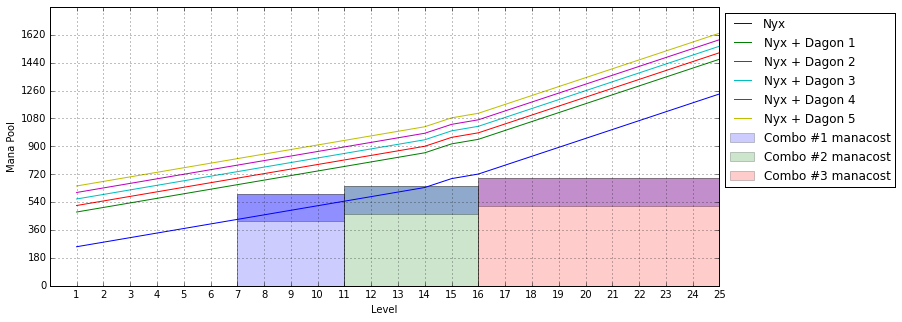

In [276]:
matrix = {
    1: {
        "range": (7,12),
        "combo": {
            "nyx_assassin_impale": game.get_ability("nyx_assassin_impale").set_level(4),
            "nyx_assassin_mana_burn": game.get_ability("nyx_assassin_mana_burn").set_level(1),
            "nyx_assassin_vendetta": game.get_ability("nyx_assassin_vendetta").set_level(1),
        }
    },
    2: {
        "range": (11,17),
        "combo": {
            "nyx_assassin_impale": game.get_ability("nyx_assassin_impale").set_level(4),
            "nyx_assassin_mana_burn": game.get_ability("nyx_assassin_mana_burn").set_level(4),
            "nyx_assassin_vendetta": game.get_ability("nyx_assassin_vendetta").set_level(2),
        }
    },
    3: {
        "range": (16,26),
        "combo": {
            "nyx_assassin_impale": game.get_ability("nyx_assassin_impale").set_level(4),
            "nyx_assassin_mana_burn": game.get_ability("nyx_assassin_mana_burn").set_level(4),
            "nyx_assassin_vendetta": game.get_ability("nyx_assassin_vendetta").set_level(3),
        }
    },
}
plt.figure(figsize=(12, 5))
# 25 levels
x = range(1, 26)

# naked nyx manapool at all levels
y = map(lambda level: nyx.set_level(level).mana, x)
plt.plot(x, y, label="Nyx")

# nyx w/ dagon manapool at all levels
for level, dagon in enumerate(dagons):
    nyx.inventory = [dagon]
    y2 = map(lambda level: nyx.set_level(level).mana, x)
    plt.plot(x, y2, label="Nyx + Dagon %d" % (level+1))
nyx.inventory = []
    
# manacost of combos from the proposed table/matrix
for column, data in matrix.items():
    x2 = range(*data['range'])
    
    # manacost of abilities
    manacost = sum([ability.manacost for ability in data['combo'].values()])
    y2 = [manacost] * len(x2)
    y2_dagon = [manacost + dagons[0].manacost] * len(x2)
    
    plt.fill([x2[0]] + x2 + [x2[-1]],  # how do i polygons?
             [0.0] + y2_dagon + [0.0],  # polygons nyx nyx nyx
             alpha=0.2,
             label="Combo #%d manacost" % column)
    
    plt.fill_between([x2[0]] + x2 + [x2[-1]], # nyx
                     [0.0] + y2_dagon + [0.0],
                     [0.0] + y2 + [0.0],
                     alpha=0.3)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(x)
plt.yticks( range(0, 1800, int(dagons[0].manacost)) )
plt.ylabel("Mana Pool")
plt.xlabel("Level")
plt.grid(True)
plt.show()

_Note: the darker area is the combo + dagon 1_  
The manacost axis is in steps of the manacost for dagon, so that is obvious how many dagon uses are possible.

![](http://i.imgur.com/X3gjETd.jpg)

Remember that high DPM as upgrade dagon? Well, what is the point of having dagon on low cooldown, if you don't have the mana to use it? As you can see the combos exhausts your entire mana pool. This solidifies OPs statement that rushing dagon is plain stupid, even if you are doing well, other items are clearly a better choice. Think Blink Dagger or Ethereal Blade. Keep in mind that this is all situational, and depends on hero compositions (see table below). Ethereall Blade is not that easy to get. 

To illustrate OPs point further lets look at how each combo performs against every hero.

# Best combo targets

* The heroes are assumed naked (no items), which should be false in reality.  
* The HP pool and armor values are calculated form the hero level (e.g. level 7 for the first combo)
* cell format: **{percent of hp}% ({damage after reduction})**

In [283]:
from IPython.display import HTML

# table formating
html = '<table><tr><th>#</th><th></th>'
for column, data in matrix.items():
    html += "<th>Level %d</th><th>+dagon1</th>" % (data['range'][0])  
html += "</tr>\n"
row_start = """
<tr><th>%(idx)s</th><td><img style="width:50px;display:inline-block;"
src='https://raw.githubusercontent.com/dotabuff/d2vpk/master/dota_pak01/resource/flash3/images/heroes/%(hero_image)s.png'>%(hero_name)s
</td>
"""
row_end = "</tr>"

damage_matrix = []
# generate table with damage per hero
for hero in map(lambda hero_name: game.get_hero(hero_name), game.heroes): 
    if hero.name == "npc_dota_hero_base": continue

    row = [hero] 
    # calculate combos
    for c, data in matrix.items():
        hero.level = data['range'][0]
        damage = 0
        
        for ability in data['combo'].values():
            if ability.name == "nyx_assassin_impale":
                damage += ability.damage * hero.magic_resistance_multiplier
            elif ability.name == "nyx_assassin_vendetta":
                damage += ability._get_value('bonus_damage', special=True) * hero.armor_multiplier
            elif ability.name == "nyx_assassin_mana_burn":
                damage += hero.int * ability._get_value('float_multiplier', special=True) * hero.magic_resistance_multiplier     
        
        damage_w_dagon = damage + dagons[0].damage * hero.magic_resistance_multiplier
        hp_percent = (damage / hero.hp) * 100
        hp_precept_dagon = (damage_w_dagon / hero.hp) * 100
        
        row += map(int, [hp_percent, damage, hp_precept_dagon, damage_w_dagon])  
    damage_matrix.append(row)

# sort highest damage first
damage_matrix = sorted(damage_matrix, reverse=True, key=lambda row: row[1:])

# generate table contents
for idx, row in enumerate(damage_matrix):
    idx += 1
    hero, row = row[0], row[1:] 
    hero_image = hero.name.replace("npc_dota_hero_","")
    hero_name = hero.data.get('url', hero_image).replace('_', ' ')
    
    # row start - hero name and icon
    html += row_start % locals()
    
    columns = iter(row)
    for percent in columns:
        if percent >= 100: color = '#a00'     # red = dead
        elif percent >= 85: color = '#ff7f00' # orange = literally dead
        elif percent >= 60: color = '#0a0'    # green = im contributing
        else: color = '#000'                  # black = game is hard
        
        html += "<td style='color:%s'>%d%% (%.02f)</td>" % (color, percent, next(columns))
        
    # row end
    html += row_end
        
html += "</table>"
HTML(html)

#,,Level 7,+dagon1,Level 11,+dagon1,Level 16,+dagon1
1,Pugna,89% (548.00),139% (848.00),112% (787.00),155% (1087.00),114% (976.00),149% (1276.00)
2,Enchantress,88% (502.00),141% (802.00),108% (695.00),154% (995.00),109% (848.00),147% (1148.00)
3,Skywrath Mage,82% (565.00),126% (865.00),101% (809.00),139% (1109.00),102% (1003.00),133% (1303.00)
4,Keeper of the Light,82% (514.00),131% (814.00),94% (715.00),134% (1015.00),90% (870.00),121% (1170.00)
5,Lina,80% (533.00),125% (833.00),96% (749.00),135% (1049.00),95% (913.00),126% (1213.00)
6,Lion,80% (518.00),126% (818.00),93% (725.00),131% (1025.00),90% (886.00),121% (1186.00)
7,Leshrac,80% (505.00),128% (805.00),95% (704.00),135% (1004.00),92% (854.00),125% (1154.00)
8,Puck,80% (504.00),128% (804.00),91% (694.00),131% (994.00),87% (836.00),118% (1136.00)
9,Dazzle,79% (527.00),124% (827.00),92% (741.00),129% (1041.00),88% (903.00),118% (1203.00)
10,Witch Doctor,79% (526.00),125% (826.00),92% (736.00),130% (1036.00),89% (898.00),119% (1198.00)


# Conclusion

Don't be an idiot, don't rush to upgrade dagon.